# Data Preparation and Exploratory Data Analysis

In [1]:
import pandas as pd
import plotly
import plotly.express as px

In [2]:
df = pd.read_excel('/content/46885244-9928-4a1b-bfb6-015ab37ba566.xlsx')

In [3]:
df.head()

,FEI Number,Recalling Firm Name,Product Type,Product Classification,Status,Distribution Pattern,Recalling Firm City,Recalling Firm State,Recalling Firm Country,Center Classification Date,Reason for Recall,Product Description,Event ID,Event Classification,Product ID,Center,Recall Details
0,2242352,"Maquet Cardiovascular, LLC",Devices,Class II,Ongoing,Nationwide\n\nForeign:\nAT\nBE\nDE\nES\nFR\nGB...,Wayne,New Jersey,United States,2023-10-22,Housing Mount Jaw of these devices breaking du...,Maquet Acrobat-i Vacuum Stabilizer System Inte...,93085,Class II,203404,CDRH,https://www.accessdata.fda.gov/scripts/ires/?P...
1,3012307300,Smiths Medical ASD Inc.,Devices,Class II,Ongoing,US,Minneapolis,Minnesota,United States,2023-10-20,The complaint involved the absence of a compon...,Portex Pro-Vent Arterial Blood Sampling Kit wi...,93094,Class II,203427,CDRH,https://www.accessdata.fda.gov/scripts/ires/?P...
2,3004526608,GE Healthcare,Devices,Class II,Ongoing,"US and Austria, Azerbaijan, Bosnia and Herzego...",Chicago,Illinois,United States,2023-10-20,GE HealthCare has become aware of an issue whe...,"Centricity PACS-IW, software versions V3.7.x t...",93099,Class II,203437,CDRH,https://www.accessdata.fda.gov/scripts/ires/?P...
3,3004526608,GE Healthcare,Devices,Class II,Ongoing,"US and Austria, Azerbaijan, Bosnia and Herzego...",Chicago,Illinois,United States,2023-10-20,GE HealthCare has become aware of an issue whe...,"Centricity PACS-IW with Universal Viewer, vers...",93099,Class II,203438,CDRH,https://www.accessdata.fda.gov/scripts/ires/?P...
4,3004526608,GE Healthcare,Devices,Class II,Ongoing,"US and Austria, Azerbaijan, Bosnia and Herzego...",Chicago,Illinois,United States,2023-10-20,GE HealthCare has become aware of an issue whe...,"Centricity Universal Viewer, software versions...",93099,Class II,203439,CDRH,https://www.accessdata.fda.gov/scripts/ires/?P...


In [4]:
df = df[["Event Classification","Reason for Recall"]] #selecting the only important columns for text classification

In [5]:
df.describe() #summary staitics of the dataset

,Event Classification,Reason for Recall
count,31012,31012
unique,3,12393
top,Class II,Recall initiated due to inadequate validation/...
freq,27598,270


In [6]:
df.duplicated() #finding if there are duplicates in the data

0        False
1        False
2        False
3         True
4         True
         ...  
31007    False
31008    False
31009    False
31010     True
31011     True
Length: 31012, dtype: bool

In [7]:
df.drop_duplicates() #dropping duplicates

,Event Classification,Reason for Recall
0,Class II,Housing Mount Jaw of these devices breaking du...
1,Class II,The complaint involved the absence of a compon...
2,Class II,GE HealthCare has become aware of an issue whe...
5,Class II,"When using affected curette and software, ther..."
6,Class II,Artificial hearts contain a epoxy resin that h...
...,...,...
31005,Class II,Potential failure in the glued seal between th...
31006,Class II,"During an internal quality inspection, the tib..."
31007,Class II,Medical device was not manufactured under Good...
31008,Class II,Philips is issuing a software update (version ...


In [8]:
df.isnull() #checking for null values

,Event Classification,Reason for Recall
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
31007,False,False
31008,False,False
31009,False,False
31010,False,False


### Exploratory Data Analysis

In [9]:
#creating a new df for visualizations purposes
#Counts all the number of cases for each classifications

df_class = df.groupby("Event Classification").count().reset_index()
df_class.head()

,Event Classification,Reason for Recall
0,Class I,2561
1,Class II,27598
2,Class III,853


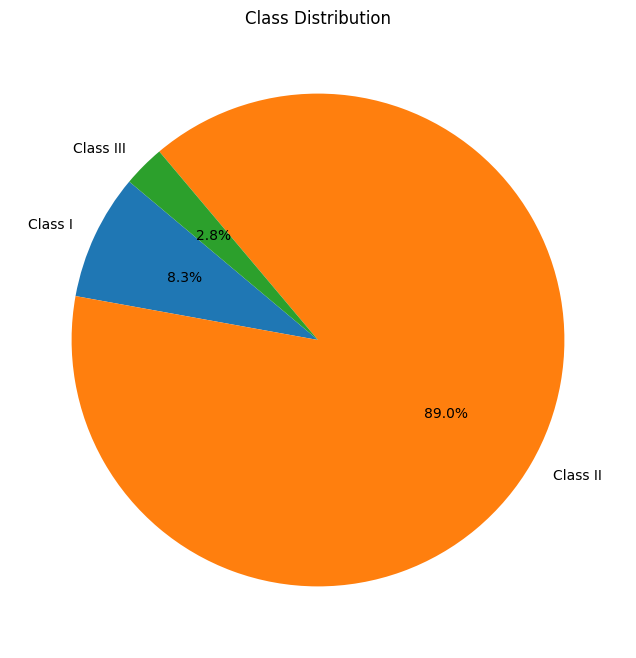

In [10]:
import matplotlib.pyplot as plt

# Extract Event classification as the labels and reason for recall as the counts
class_labels = df_class['Event Classification']
class_counts = df_class['Reason for Recall']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.show()

In [11]:
# creating a bar chart to shows the distribution between the classes
plt.figure(figsize=(8, 12))
fig = px.bar(df_class, x='Event Classification', y='Reason for Recall')
fig.show()

<Figure size 800x1200 with 0 Axes>

In [12]:
# changing datatype to string, so they can be normalized
df['Reason for Recall'] = df['Reason for Recall'].astype(str)
df['Event Classification'] = df['Event Classification'].astype(str)

In [13]:
# changing all the words to lowercase
df['Reason for Recall'] = df['Reason for Recall'].apply(lambda x: x.lower())

In [14]:
#importing all the required libraries for tokenizing
import nltk
nltk.download('punkt')
from nltk.tokenize import RegexpTokenizer
regexp = RegexpTokenizer('\w+')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [15]:
# tokenizing the feature column
df['Reason for Recall'] = df['Reason for Recall'].apply(regexp.tokenize)
df['Reason for Recall'].head(3)

0    [housing, mount, jaw, of, these, devices, brea...
1    [the, complaint, involved, the, absence, of, a...
2    [ge, healthcare, has, become, aware, of, an, i...
Name: Reason for Recall, dtype: object

In [16]:
# importing the libraries needed for stopwords
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
# finding all common stopwords in the dataset
df['Reason for Recall'] = df['Reason for Recall'].apply(lambda x: [word for word in x if word not in stopwords])
df['Reason for Recall'].head(3)

0    [housing, mount, jaw, devices, breaking, norma...
1    [complaint, involved, absence, component, call...
2    [ge, healthcare, become, aware, issue, images,...
Name: Reason for Recall, dtype: object

In [18]:
# importing libaries for finding the stem words
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
# chanding all the words to their stem words
df['Reason for Recall'] = df['Reason for Recall'].apply(lambda word_list: [porter.stem(word) for word in word_list])
print(df['Reason for Recall'])

0        [hous, mount, jaw, devic, break, normal, use, ...
1        [complaint, involv, absenc, compon, call, asm,...
2        [ge, healthcar, becom, awar, issu, imag, two, ...
3        [ge, healthcar, becom, awar, issu, imag, two, ...
4        [ge, healthcar, becom, awar, issu, imag, two, ...
                               ...                        
31007    [medic, devic, manufactur, good, manufactur, p...
31008    [philip, issu, softwar, updat, version, 3, 2, ...
31009    [incid, report, oper, finger, pinch, fix, roll...
31010    [incid, report, oper, finger, pinch, fix, roll...
31011    [incid, report, oper, finger, pinch, fix, roll...
Name: Reason for Recall, Length: 31012, dtype: object


In [20]:
!pip install -qq wordcloud

In [21]:
# importing all necessary modules
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt


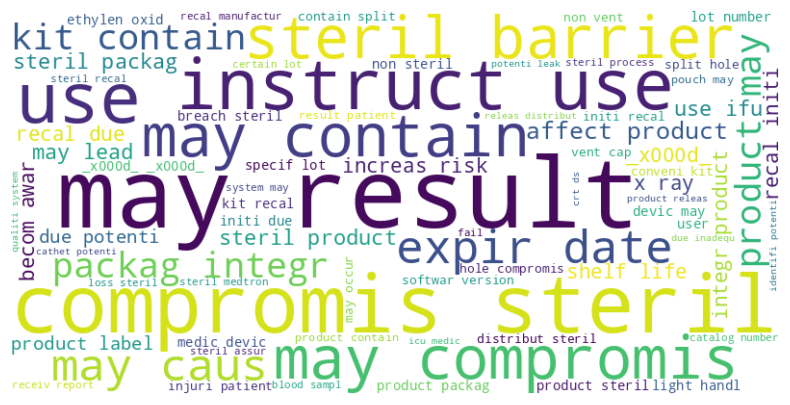

In [22]:
text = ' '.join(word for sublist in df['Reason for Recall'] for word in sublist)

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white',min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [23]:
#library for frequency distribution of words in the dataset
from nltk.probability import FreqDist

In [24]:
words = [word for sublist in df['Reason for Recall'] for word in sublist]

# Create FreqDist
fdist = FreqDist(words)

# Check top 5 common words
print(fdist.most_common(5))

[('may', 13648), ('product', 8514), ('result', 7666), ('steril', 7645), ('potenti', 7393)]


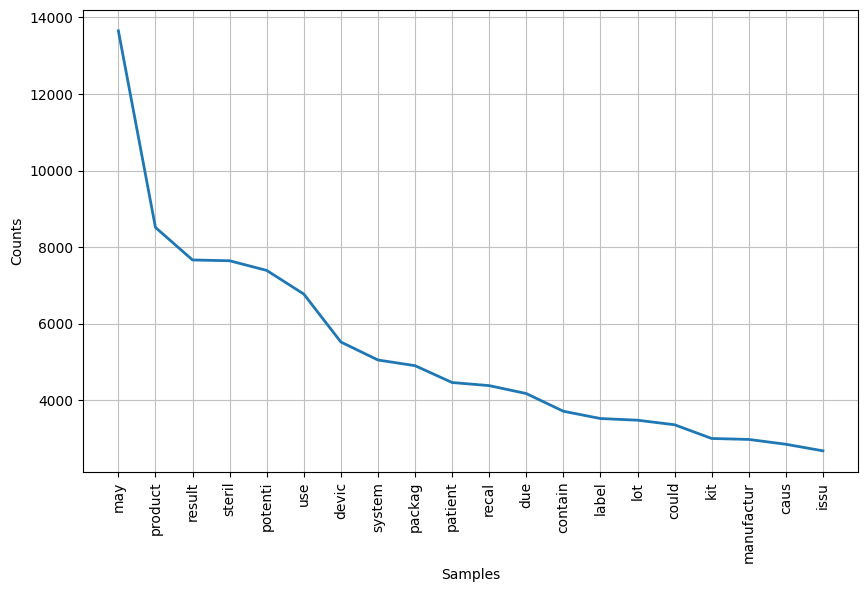

In [25]:
# Import matplotlib
import matplotlib.pyplot as plt

#setting the size of the plot
plt.figure(figsize=(10, 6))

# Plot Frequency Distribution
fdist.plot(20, cumulative=False)
plt.show()

# Model Training and Deployment


In [26]:
# importing required libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, f1_score

In [27]:
vectorizer = TfidfVectorizer()

In [28]:
#combining tokenized words back into the column
df['Reason for Recall'] = df['Reason for Recall'].apply(lambda word_list: ' '.join(word_list))

In [29]:
# making y equal to the target variable
y = df["Event Classification"]

In [30]:
# transforming feature column into numerical column, so ML models can understand it, and making it equal to X
X = vectorizer.fit_transform(df['Reason for Recall'])
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
from imblearn.over_sampling import SMOTE
# using synthetic samples to increase the minority class to balance distribution

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [32]:
# Splitting the dataste into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Multinomial Naive Bayes

In [33]:
#importing multinomial Naive Bayes distribution

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(force_alpha=True)
clf.fit(X_train, y_train)

MultinomialNB(force_alpha=True)

In [34]:
# prediction of target variable
y_pred= clf.predict(X_test)

In [35]:
# importing required metrics to measure how well the models is doing
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)

0.9366507639350202

In [36]:
# calculation of the metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [37]:
#printing out the results of the metrics
print("Precision:", precision)
print("F1 Score:", f1)
print("Recall:", recall)

Precision: 0.9365612440479867
F1 Score: 0.9364057368799749
Recall: 0.9366507639350202


In [38]:
## printing out the summary of how good the model is doing
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Class I       0.95      0.95      0.95      5580
    Class II       0.93      0.89      0.91      5448
   Class III       0.93      0.97      0.95      5531

    accuracy                           0.94     16559
   macro avg       0.94      0.94      0.94     16559
weighted avg       0.94      0.94      0.94     16559



In [39]:
# importing required libraries for confusion matrix
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

%matplotlib inline

def confusion_matrix_heatmap(cm: np.ndarray) -> plt.Figure:
    sns.set(font_scale=2)
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt=',')
    ax.set_xlabel("Predicted Class")
    ax.set_ylabel("Actual Class")
    return fig

#function to for confusion matric heatmap

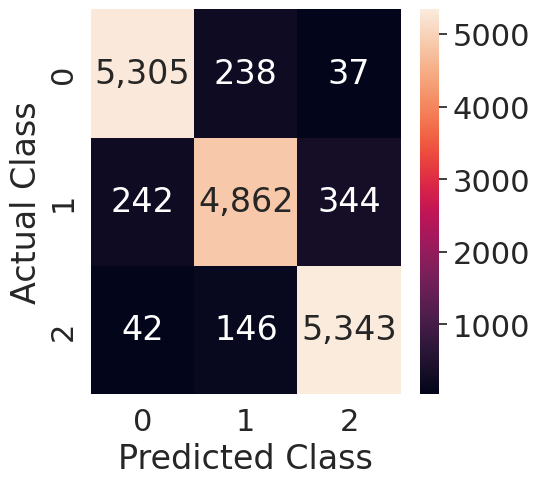

In [40]:
# printing the results for confusion matrix
confusion_matrix_heatmap(confusion_matrix(y_test, y_pred))
pass

### Hyperparameter Tuning for MNB

In [41]:
# Improting Grid Search for hyperparameter tuning to prevent overfitting
from sklearn.model_selection import GridSearchCV

# grid values for hyperparameter tuning
alpha_values = [0.1, 0.5, 1.0, 1.5]

param_grid = {'alpha': alpha_values}

# Using Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_alpha = grid_search.best_params_['alpha']
best_clf = grid_search.best_estimator_

In [42]:
# Evaluating the best Multinomial Naive Bayes model on the test set
# prediction of target variable

y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Alpha:", best_alpha)
print("Accuracy:", accuracy)

Best Alpha: 0.1
Accuracy: 0.9541035086659823


### Random Forest Classifier


In [43]:
# importing random forest model and fitting it to the training data. Also using balanced weight because of the unbalanced dataset we have
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [44]:
# prediction of target variable and printing out the results
y_pred= rf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9947460595446584

In [45]:
# calculation of the metrics
recision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [46]:
#printing out the results of the metrics
print("Precision:", precision)
print("F1 Score:", f1)
print("Recall:", recall)

Precision: 0.9365612440479867
F1 Score: 0.9947487395133683
Recall: 0.9947460595446584


In [47]:
# printing out the summary of how good the model is doing
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Class I       1.00      0.99      1.00      5580
    Class II       0.99      0.99      0.99      5448
   Class III       0.99      1.00      1.00      5531

    accuracy                           0.99     16559
   macro avg       0.99      0.99      0.99     16559
weighted avg       0.99      0.99      0.99     16559



In [48]:
# importing require libraries for confusion matrix
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

%matplotlib inline

def confusion_matrix_heatmap(cm: np.ndarray) -> plt.Figure:
    sns.set(font_scale=2)
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt=',')
    ax.set_xlabel("Predicted Class")
    ax.set_ylabel("Actual Class")
    return fig

#function to print out confusion matric heatmap

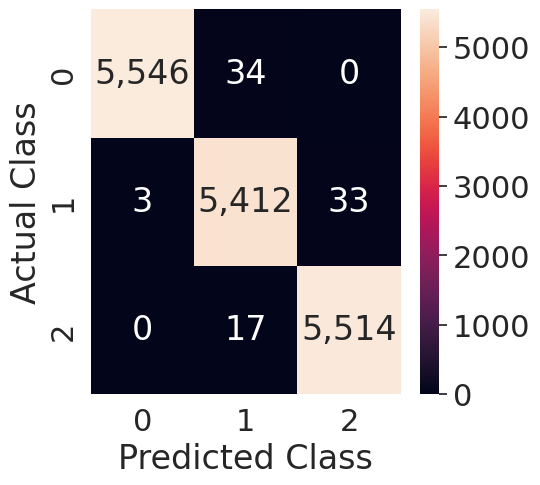

In [49]:
# printing the results for confusion matrix
confusion_matrix_heatmap(confusion_matrix(y_test, y_pred))
pass

### Hyperparameter Tuning for RF

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [57]:
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt']
}


In [58]:
random_search = RandomizedSearchCV(estimator=rf,
    param_distributions=param_dist,  n_iter=5,
    cv=5,random_state=42, n_jobs=-1)

In [59]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7980775b7a00>,
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7980775b48e0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7980775b6aa0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7980775b53c0>},
                   random_state=42)

In [64]:
best_params = random_search.best_estimator_.get_params()
best_score = random_search.best_score_

In [65]:
print("Best Parameters: ",best_params)
print("Best Score: ",best_score)

Best Parameters:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 6, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 70, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Best Score:  0.8040612968974108


In [67]:
from sklearn.metrics import accuracy_score

In [71]:
y_pred =rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 99.47%


# LSTM- simple neural netowkrs

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df["Event Classification"])

In [ ]:
flatten_tokens = [token for sublist in df["Reason for Recall"] for token in sublist]
vocab = set(flatten_tokens)
vocab_size = len(vocab)

In [ ]:
max_sequence_length = max(len(tokens) for tokens in df["Reason for Recall"])

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df["Reason for Recall"])
sequences = tokenizer.texts_to_sequences(df["Reason for Recall"])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(padded_sequences,labels, test_size=0.2, random_state=42)

In [ ]:
embedding_dim = 100
lstm_units = 64
num_classes = 10

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(units=lstm_units))
model.add(Dense(units=num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
num_epochs = 10
batch_size = 32

In [ ]:
model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Epoch 1/10
776/776 [==============================] - 840s 1s/step - loss: 0.4222 - accuracy: 0.8876 - val_loss: 0.3586 - val_accuracy: 0.8889
Epoch 2/10
776/776 [==============================] - 814s 1s/step - loss: 0.3340 - accuracy: 0.9061 - val_loss: 0.3114 - val_accuracy: 0.9120
Epoch 3/10
776/776 [==============================] - 812s 1s/step - loss: 0.3092 - accuracy: 0.9147 - val_loss: 0.2938 - val_accuracy: 0.9146
Epoch 4/10
776/776 [==============================] - 817s 1s/step - loss: 0.2987 - accuracy: 0.9163 - val_loss: 0.2857 - val_accuracy: 0.9149
Epoch 5/10
776/776 [==============================] - 812s 1s/step - loss: 0.2918 - accuracy: 0.9173 - val_loss: 0.2826 - val_accuracy: 0.9157
Epoch 6/10
776/776 [==============================] - 816s 1s/step - loss: 0.2870 - accuracy: 0.9179 - val_loss: 0.2722 - val_accuracy: 0.9155
Epoch 7/10
776/776 [==============================] - 815s 1s/step - loss: 0.2797 - accuracy: 0.9191 - val_loss: 0.2652 - val_accuracy: 0.9202

In [ ]:
loss, accuracy = model.evaluate(X_val, y_val)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

# Make predictions
predictions = model.predict(X_val)

194/194 [==============================] - 49s 252ms/step - loss: 0.2482 - accuracy: 0.9278
Validation Loss: 0.24816015362739563
Validation Accuracy: 0.9277768731117249
194/194 [==============================] - 42s 211ms/step
